### ME 574 Winter 2019 Homework 1
### Jingyuan Liu

**1)  
a)Create a python procedure corresponding to the mathematical function $g(x) = 2 \, sin(x) \, cos(x)$. (How do you access trig functions in python? Google is your help menu. Go exploring.)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def g(x):
    return 2 * np.sin(x) * np.cos(x)

**b) Create a numpy array of function values with uniform spacing $\delta x = 0.1$ on $0 \leq x \leq \pi$.**

In [3]:
arr = np.arange(np.ceil(10*np.pi)) / 10
arr

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1])

**c) Plot your data to produce a visualization of $g(x)$.**

In [4]:
y = np.empty(arr.size)
for i in range(arr.size):
    y[i] = g(arr[i])

Text(0.5, 1.0, 'visualization of g(x)')

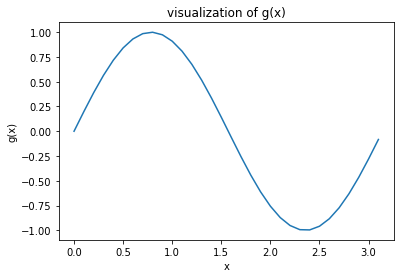

In [5]:
plt.plot(arr, y)
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('visualization of g(x)')

**d) Does the function look familiar? Explain briefly.**

Yes. This looks like a sine function with period $\pi$ instead of $2\pi$. From double angle formula, we know that actually $g(x)=sin(2x)$.

**2) Shorghofer Problem 2.1 (interpreting "prove" as "explain why"). Discuss the implications of your result for part d.  
a) Plot the function $f(x) = 3\pi^4x^2 + ln((x − \pi)^2)$ in the range 0 to 4.**

Text(0.5, 1.0, 'visualization of f(x)')

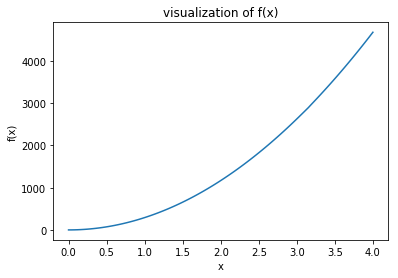

In [6]:
x = np.linspace(0, 4, 100)
y = 3*np.power(np.pi, 4)*np.square(x) + np.log(np.square(x-np.pi))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('visualization of f(x)')

**b) Prove that $f(x)$ has two roots, $f(x) = 0$.**

Suppose $x = \pi + \epsilon$ where $\epsilon$ is very small. Then the first part $3\pi^4x^2 \approx 3\pi^6$ is a finite positive number. However, we know the second part $ln((x-\pi)^2) = ln((\epsilon)^2) \to -\infty$ when $\epsilon \to 0$. This means the second part is able to counter the first part and $f(x)$ will become zero somewhere near $\pi$. Since $\epsilon$ can approximate 0 from two sides, we know that there are two $epsilon$ very close to zero, one positive and one negative, will make $f(x)=0$.  
By the way, the reason why the negative peak doesn't show up in the above plot, is that we haven't sampled a $x$ value that is close enough to $\pi$. It should be really close to get negative. We can understand this more in c).

**c) Estimate the distance between the two roots.**

We know $3\pi^6 \approx 2884.1675807259126$, then for the roots $\epsilon^2 \approx e^{-2884.1675807259126} \Rightarrow |\epsilon| \approx e^{-1442.0837903629563}$. So we can estimate the distance to be $2|\epsilon| \approx 2e^{-1442.0837903629563}$.

**d) Plot the function in the vicinity of these roots. Does the graph of the function change sign, as it must?**

We try and find $e^{-1442.0837903629563}$ causes numerical underflow in Python. In fact, $e^{-800}$ already does. This means we are not likely to get close enough for $f(x)$ to become negative.

In [7]:
np.exp(-1442.0837903629563)

0.0

In [8]:
np.exp(-800)

0.0

Text(0.5, 1.0, 'visualization of f(x) near pi')

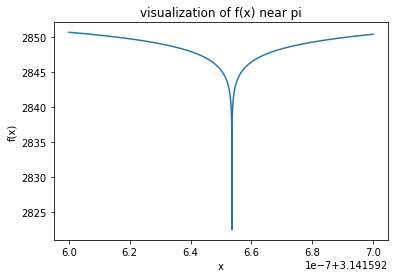

In [9]:
x = np.linspace(3.1415926, 3.1415927, 10**6)
y = 3*np.power(np.pi, 4)*np.square(x) + np.log(np.square(x-np.pi))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('visualization of f(x) near pi')

Not a surprise, we do not see the change of sign.

**3)  
Adapt your code from class to determine values of $\beta$ (called $r$ in the book) for at least 4 period doublings. Based on your $\beta$ values, determine an estimate for Feigenbaum's universal scaling ratio.**

In [10]:
def f(x, beta):
    x_new = beta * x * (1-x)
    return x_new

In [11]:
def logisticIterate(x0, beta, n):
    xval = x0
    for i in range(n):
        xval = f(xval, beta)
    return xval

In [39]:
def find_point(idx, b, step, n):
    '''
    Determine a precise b value where doubling appears
    '''
    b_prev = b
    x = np.empty(n)
    while True:
        b -= step
        x[0] = logisticIterate(x0, b, n_drop)
        for i in range(1, n):
            x[i] = f(x[i - 1], b)
        current_states = np.sum(np.diff(np.sort(x))>threshold) + 1
        if current_states == 2**idx:
            return (b+b_prev) / 2
        b_prev = b

In [56]:
# This cell may take a minute or two...
b_start = 2.9
step_start = 0.001
ratio = 0.1 # step change ratio
n = 100
n_drop = 1000
x0 = 0.5
x = np.empty(n)
threshold = 1e-3 # threshold for gaps among different states
num = 3
points = []

b = b_start
step = step_start
idx = 0
while idx < num and b < 4:
    x[0] = logisticIterate(x0, b, n_drop)
    for i in range(1, n):
        x[i] = f(x[i - 1], b)
    current_states = np.sum(np.diff(np.sort(x))>threshold) + 1
    if current_states == 2**(idx+1):
        step *= ratio
        points.append(find_point(idx, b, step, n))
        idx += 1        
    b += step

In [57]:
points

[2.996749999999989, 3.4484550000009397, 3.5437635000014995]

In [58]:
(points[1]-points[0])/(points[2]-points[1])

4.739398899345785

This is a fairly good estimate as the final constant is about 4.6692.

**4)  
a) Write a python function to implement the typical version of the quadratic formula. The function should return a 2-tuple of values sorted by magnitude.**

In [77]:
def typical_quadratic(a, b, c):
    sqrt = np.sqrt(b**2 - 4*a*c)
    tup = ((-b+sqrt)/(2*a), (-b-sqrt)/(2*a))
    if np.abs(tup[0]) > np.abs(tup[1]):
        tup = (tup[1], tup[0])
    return tup

**b) Use your function to compute the solutions of the quadratic equation $x^2-(r + \frac{1}{r}) x +1 = 0$.**

In [107]:
typical_quadratic(1, 2, -3)

(1.0, -3.0)

**c) Factor the quadratic polynomial analytically. What are the exact roots in terms of the parameter $r$?**

$x^2-(r + \frac{1}{r}) x +1 = (x - r)(x - \frac1r)$  
So the two exact roots are $r$ and $\frac1r$.

**d) Use your implementation of the quadratic formula to compute the roots for $r = 2^n$ for $1 \leq n \leq 16$.**

In [109]:
for r in 2**np.arange(1, 30):
    print(typical_quadratic(1, -(r+1/r), 1))

(0.5, 2.0)
(0.25, 4.0)
(0.125, 8.0)
(0.0625, 16.0)
(0.03125, 32.0)
(0.015625, 64.0)
(0.0078125, 128.0)
(0.00390625, 256.0)
(0.001953125, 512.0)
(0.0009765625, 1024.0)
(0.00048828125, 2048.0)
(0.000244140625, 4096.0)
(0.0001220703125, 8192.0)
(6.103515625e-05, 16384.0)
(3.0517578125e-05, 32768.0)
(1.52587890625e-05, 65536.0)
(7.62939453125e-06, 131072.0)
(3.814697265625e-06, 262144.0)
(1.9073486328125e-06, 524288.0)
(9.5367431640625e-07, 1048576.0)
(4.76837158203125e-07, 2097152.0)
(2.384185791015625e-07, 4194304.0)
(1.1920928955078125e-07, 8388608.0)
(5.960464477539063e-08, 16777216.0)
(2.9802322387695312e-08, 33554432.0)
(1.4901161193847656e-08, 67108864.0)
(7.450580596923828e-09, 134217728.0)
(0.0, 268435456.0)
(0.0, 536870912.0)


**e) Compare the computed values with the known exact values. Describe situations where a root is inaccurately computed. Which root(s) exhibit problems? Why? What causes the problems?**

In [110]:
for r in 2**np.arange(1, 30):
    print(1/r, r)

0.5 2
0.25 4
0.125 8
0.0625 16
0.03125 32
0.015625 64
0.0078125 128
0.00390625 256
0.001953125 512
0.0009765625 1024
0.00048828125 2048
0.000244140625 4096
0.0001220703125 8192
6.103515625e-05 16384
3.0517578125e-05 32768
1.52587890625e-05 65536
7.62939453125e-06 131072
3.814697265625e-06 262144
1.9073486328125e-06 524288
9.5367431640625e-07 1048576
4.76837158203125e-07 2097152
2.384185791015625e-07 4194304
1.1920928955078125e-07 8388608
5.960464477539063e-08 16777216
2.9802322387695312e-08 33554432
1.4901161193847656e-08 67108864
7.450580596923828e-09 134217728
3.725290298461914e-09 268435456
1.862645149230957e-09 536870912


We notice that the solutions do not match for the last two $r$ values, $2^{28}$ and $2^{29}$. The first roots or the smaller ones are not correct. The reason is that when $r$ is very large, $b^2$ is too large than $4ac$, which means the square root is very close to $|b|$. We know in our case $b>0$, so $-b+\sqrt{b^2-4ac} \approx -b+b = 0$, where a effect of cancellation happens.

**f) Implement the alternate version of the quadratic formula discussed in Shorghofer Section 3.3, then recompute the roots for the same set of values of $r$. Compare the outcome to your results from parts c-e and discuss. Which implementation is preferred and why?**

In [99]:
def robust_quadratic(a, b, c):
    q = -(b+np.sign(b)*np.sqrt(b**2-4*a*c))/2
    tup = (q/a, c/q)
    if np.abs(tup[0]) > np.abs(tup[1]):
        tup = (tup[1], tup[0])
    return tup

In [111]:
for r in 2**np.arange(1, 30):
    print(robust_quadratic(1, -(r+1/r), 1))

(0.5, 2.0)
(0.25, 4.0)
(0.125, 8.0)
(0.0625, 16.0)
(0.03125, 32.0)
(0.015625, 64.0)
(0.0078125, 128.0)
(0.00390625, 256.0)
(0.001953125, 512.0)
(0.0009765625, 1024.0)
(0.00048828125, 2048.0)
(0.000244140625, 4096.0)
(0.0001220703125, 8192.0)
(6.103515625e-05, 16384.0)
(3.0517578125e-05, 32768.0)
(1.52587890625e-05, 65536.0)
(7.62939453125e-06, 131072.0)
(3.814697265625e-06, 262144.0)
(1.9073486328125e-06, 524288.0)
(9.5367431640625e-07, 1048576.0)
(4.76837158203125e-07, 2097152.0)
(2.384185791015625e-07, 4194304.0)
(1.1920928955078125e-07, 8388608.0)
(5.960464477539063e-08, 16777216.0)
(2.9802322387695312e-08, 33554432.0)
(1.4901161193847656e-08, 67108864.0)
(7.450580596923828e-09, 134217728.0)
(3.725290298461914e-09, 268435456.0)
(1.862645149230957e-09, 536870912.0)


We see the implementation given by the textbook gives the same results as the analytic solution. This implementation is prefered to the naive implementation as it avoids the effect of cancellation when subtracting two close numbers.

**5) Do Shorghofer's Problem 3.3 and include an example you constructed to where your implementation works while the naive version fails.**

In [88]:
def my_hypot(x, y):
    return np.sqrt(x) * np.sqrt(x+y*(y/x))

def naive_hypot(x, y):
    return np.sqrt(x**2 + y**2)

In [94]:
x = 10.**200
print(my_hypot(x, x))
print(naive_hypot(x, x))

1.414213562373095e+200


OverflowError: (34, 'Result too large')